# Problème Monty Hall

Imaginez un jeu télévisé où il y a trois portes sur le plateau de jeu. Seule une de ces portes cache un trésor. Il n'y a rien derrière les deux autres portes. Rien ne permet de savoir quelle porte cache le trésor.

La tâche du joueur consiste à choisir parmi les trois portes celle qu'il veut ouvrir. Il aura droit au trésor s'il choisit la bonne porte, et rien sinon. Pour faire son choix, il n'a aucune information. Il doit donc simplement s'en remettre au hasard.

Jusqu'ici, le problème n'a rien de remarquable. Mais il y a un twist ! Une fois que le joueur a fait son choix, mais avant d'ouvrir la porte, le présentateur élimine, parmi les deux portes non choisies, une porte qui ne contient pas de trésor. Si les deux portes restantes ne contiennent rien, le présentateur élimine simplement une d'entre elles au hasard.

Le joueur doit alors faire un nouveau choix. Il peut soit choisir d'ouvrir la première porte qu'il avait choisie, soit changer pour la porte non éliminée par le présentateur. La question est, qu'a-t-il intérêt à faire ? Réfléchissez-y. Vous n'avez en principe pas besoin de connaissances poussées en probabilités pour résoudre ce problème. Que feriez-vous ?

# Simulation

In [3]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [4]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [14]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [15]:
seed()
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

seed(1)
# Les deux prochains appels vont retourner le même résultat que les deux précédents
print("Premier nombre aléatoire: {}".format(randint(0,100)))
print("Deuxième nombre aléatoire: {}".format(randint(0,100)))

Premier nombre aléatoire: 42
Deuxième nombre aléatoire: 92
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72
Premier nombre aléatoire: 17
Deuxième nombre aléatoire: 72


In [16]:
play_game(Strategie.CHANGER)

True

In [17]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [18]:
play(Strategie.CHANGER,3)

[1, 0, 0]

In [21]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6639 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3328 sur 10000 parties.


# Analyse

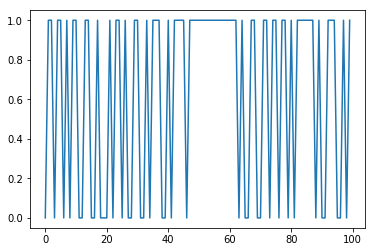

In [24]:
# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
plot = plt.plot(play(Strategie.CHANGER, 100))

In [27]:
plot = plt.scatter(range(100), play(Strategie.CHANGER, 100)) # ne reli pas les points entre eux

SyntaxError: unexpected EOF while parsing (<ipython-input-27-dcd13aa36a80>, line 1)

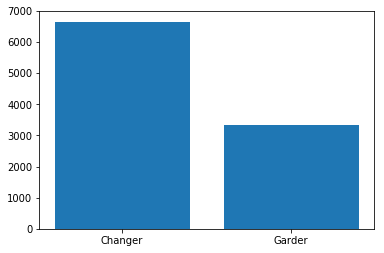

In [28]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

In [29]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

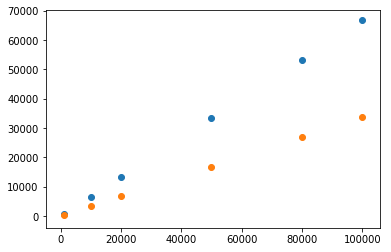

In [41]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

In [46]:
figure = plt.figure()
s_changer=[sum(x) for x in gains_changer]
s_garder=[sum(x) for x in gains_garder]


print("Moyenne des gains de la strategie changer : {}".format(sum(s_changer)/sum(samples)))
print("Moyenne des gains de la strategie garder  : {}".format(sum(s_garder)/sum(samples)))

Moyenne des gains de la strategie changer : 0.6667164750957855
Moyenne des gains de la strategie garder  : 0.3351724137931035


# Explication théorique

L'explication de ce résultat est finalement assez simple. Quand le joueur choisit une porte au début du jeu, il a une chance sur trois de tomber sur la porte qui cache le trésor. La probabilité que le trésor se cache derrière une des deux portes restantes est donc de 2/3.

L'élimination par le présentateur d'une des deux portes restantes ne change pas ces probabilités. Il élimine forcément une porte qui ne cache pas de trésor. La probabilité que la porte qu'il n'élimine pas contienne le trésor devient égale à 2/3.